# **SVM**

## Exploring the Dataset:

In [5]:
import pandas as pd
df = pd.read_csv("final_cleaned_oscars.csv")
df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Average,Genres,Director,IMDb_Rating
0,1972,Best Cinematography,1776,tt0068156,"Harry Stradling, Jr.",False,14902,6.8,6.8,"Drama, History, Musical",Peter H. Hunt,7.2
1,2019,Best Cinematography,1917,tt8579674,Roger Deakins,True,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
2,2019,Best Director,1917,tt8579674,Sam Mendes,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
3,2019,Best Picture,1917,tt8579674,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...",False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
4,2019,Best Original Screenplay,1917,tt8579674,Written by Sam Mendes & Krysty Wilson-Cairns,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2


 ## Data Preprocessing (Label Encoding and Selection)

In [6]:
from sklearn.preprocessing import LabelEncoder

features = ['Popularity', 'Vote_Average', 'IMDb_Rating']
label = 'Winner'

X = df[features]
y = df[label].astype(int)

X = X.dropna()
y = y.loc[X.index]

## Splitting into Training and Testing Sets:

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
X_train.head(10)

,Popularity,Vote_Average,IMDb_Rating
2085,7.2,7.2,7.3
2513,73.7,8.2,8.6
354,27.2,7.3,7.7
3185,112.6,8.6,9.0
552,23.9,7.5,7.8
3942,4.5,6.5,7.0
1876,36.4,7.6,7.8
379,10.2,6.8,7.3
3773,1.3,4.8,6.7
641,12.8,6.3,6.8


In [17]:
y_train.head(10)

,Winner
2085,1
2513,0
354,1
3185,1
552,0
3942,0
1876,1
379,0
3773,0
641,0


## Applying SMOTE

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

from collections import Counter
print("Original y_train distribution:", Counter(y_train))
print("Balanced y_train_bal distribution:", Counter(y_train_bal))

Original y_train distribution: Counter({0: 2659, 1: 635})
Balanced y_train_bal distribution: Counter({1: 2659, 0: 2659})


In [20]:
X_train_bal.head(10)

,Popularity,Vote_Average,IMDb_Rating
0,7.2,7.2,7.3
1,73.7,8.2,8.6
2,27.2,7.3,7.7
3,112.6,8.6,9.0
4,23.9,7.5,7.8
5,4.5,6.5,7.0
6,36.4,7.6,7.8
7,10.2,6.8,7.3
8,1.3,4.8,6.7
9,12.8,6.3,6.8


In [21]:
y_train_bal.head(10)

,Winner
0,1
1,0
2,1
3,1
4,0
5,0
6,1
7,0
8,0
9,0


## Saving the datasets

In [22]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

X_train_bal.to_csv("X_train_balanced.csv", index=False)
y_train_bal.to_csv("y_train_balanced.csv", index=False)

## ****SVM Classifier - Linear Kernel****

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

linear_model = SVC(kernel='linear', C=1)
linear_model.fit(X_train_bal, y_train_bal)
linear_preds = linear_model.predict(X_test)

In [10]:
# Confusion Matrix:
cm_linear = confusion_matrix(y_test, linear_preds)
print("Linear Kernel - Classification Report")
print(classification_report(y_test, linear_preds))

Linear Kernel - Classification Report
              precision    recall  f1-score   support

           0       0.87      0.48      0.62       665
           1       0.24      0.69      0.36       159

    accuracy                           0.52       824
   macro avg       0.55      0.58      0.49       824
weighted avg       0.74      0.52      0.57       824



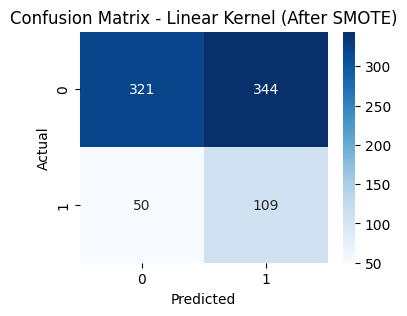

In [11]:
# Plot
plt.figure(figsize=(4, 3))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Linear Kernel (After SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **SVM Classifier - Polynomial Kernel**

In [23]:
poly_model = SVC(kernel='poly', degree=3, C=1, random_state=42)
poly_model.fit(X_train_bal, y_train_bal)
poly_preds = poly_model.predict(X_test)

In [27]:
# Classification Report

print("Polynomial Kernel - Classification Report")
print(classification_report(y_test, poly_preds))

Polynomial Kernel - Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       665
           1       0.22      0.12      0.16       159

    accuracy                           0.75       824
   macro avg       0.52      0.51      0.50       824
weighted avg       0.70      0.75      0.72       824



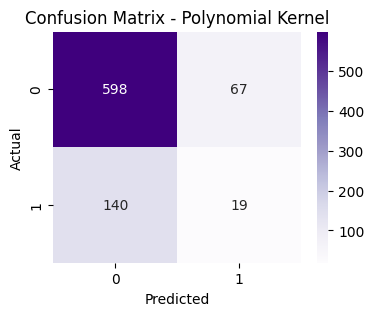

In [24]:
# Confusion Matrix

cm_poly = confusion_matrix(y_test, poly_preds)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Polynomial Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **SVM Classifier - RBF Kernel**

In [28]:
rbf_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
rbf_model.fit(X_train_bal, y_train_bal)
rbf_preds = rbf_model.predict(X_test)

In [29]:
# Classification Report

print("RBF Kernel - Classification Report")
print(classification_report(y_test, rbf_preds))

RBF Kernel - Classification Report
              precision    recall  f1-score   support

           0       0.88      0.47      0.61       665
           1       0.25      0.72      0.37       159

    accuracy                           0.52       824
   macro avg       0.56      0.60      0.49       824
weighted avg       0.75      0.52      0.56       824



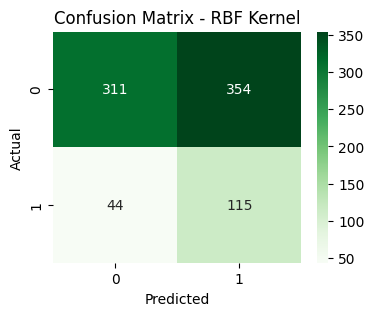

In [30]:
# Confusion Matrix

cm_rbf = confusion_matrix(y_test, rbf_preds)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Comparing SVM Kernels**

In [31]:
from sklearn.metrics import accuracy_score, f1_score

kernel_names = ['Linear', 'Polynomial', 'RBF']
accuracies = [
    accuracy_score(y_test, linear_preds),
    accuracy_score(y_test, poly_preds),
    accuracy_score(y_test, rbf_preds)
]

f1_class0 = [
    f1_score(y_test, linear_preds, pos_label=0),
    f1_score(y_test, poly_preds, pos_label=0),
    f1_score(y_test, rbf_preds, pos_label=0)
]

f1_class1 = [
    f1_score(y_test, linear_preds, pos_label=1),
    f1_score(y_test, poly_preds, pos_label=1),
    f1_score(y_test, rbf_preds, pos_label=1)
]

## Accuracy

In [35]:
print("\nAccuracy Comparison:")
for kernel, acc in zip(kernel_names, accuracies):
    print(f"{kernel} Kernel Accuracy: {acc:.4f}")


Accuracy Comparison:
Linear Kernel Accuracy: 0.5218
Polynomial Kernel Accuracy: 0.7488
RBF Kernel Accuracy: 0.5170


## Visualization

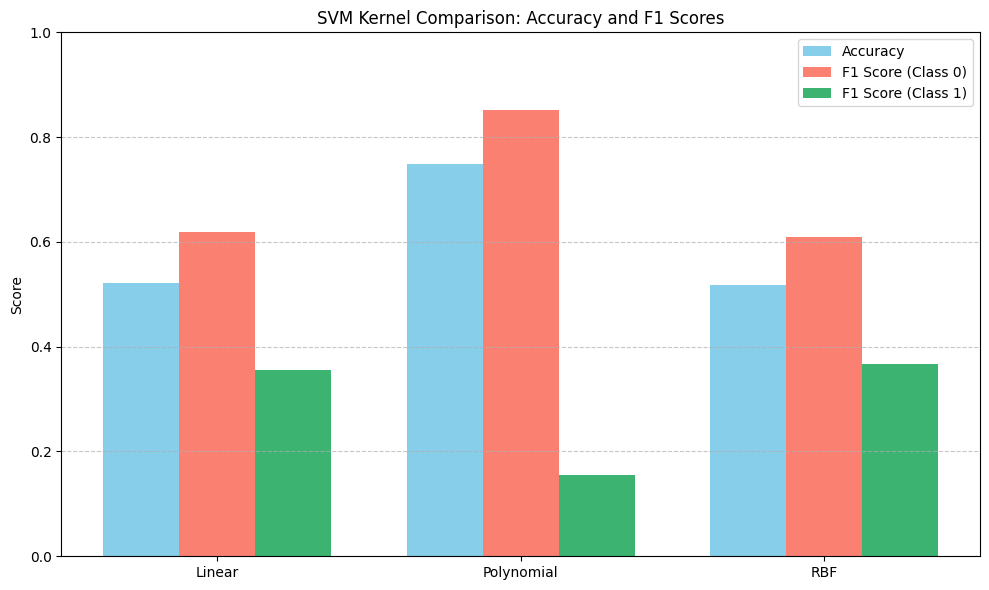

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(kernel_names))  # bar positions
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(x, f1_class0, width, label='F1 Score (Class 0)', color='salmon')
plt.bar(x + width, f1_class1, width, label='F1 Score (Class 1)', color='mediumseagreen')

plt.xticks(x, kernel_names)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("SVM Kernel Comparison: Accuracy and F1 Scores")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()